<img src="https://rhyme.com/assets/img/logo-dark.png" align="center"> 

<h2 align="center">Simple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

### Task 2: Loading the Data and Importing Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [9]:
advert = pd.read_csv('Advertising.csv')
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Task 3: Remove the index column

In [11]:
advert.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
advert.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
advert.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### Task 4: Exploratory Data Analysis

<AxesSubplot:xlabel='Sales', ylabel='Count'>

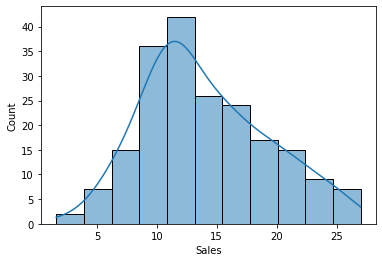

In [17]:
sns.histplot(advert.Sales, kde=True)

<AxesSubplot:xlabel='TV', ylabel='Count'>

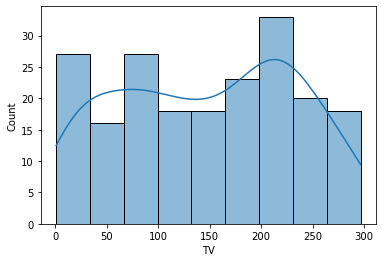

In [18]:
sns.histplot(advert.TV, kde=True)

<AxesSubplot:xlabel='Radio', ylabel='Count'>

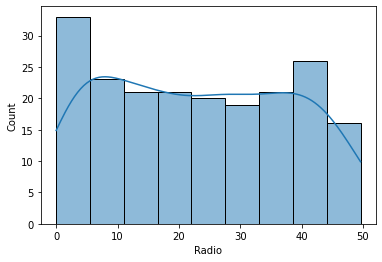

In [19]:
sns.histplot(advert.Radio, kde=True)

<AxesSubplot:xlabel='Newspaper', ylabel='Count'>

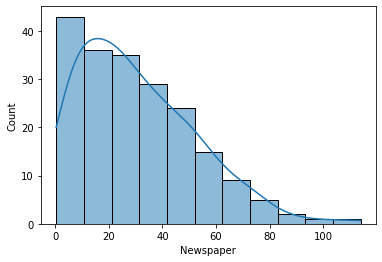

In [20]:
sns.histplot(advert.Newspaper, kde=True)

### Task 5: Exploring Relationships between Predictors and Response

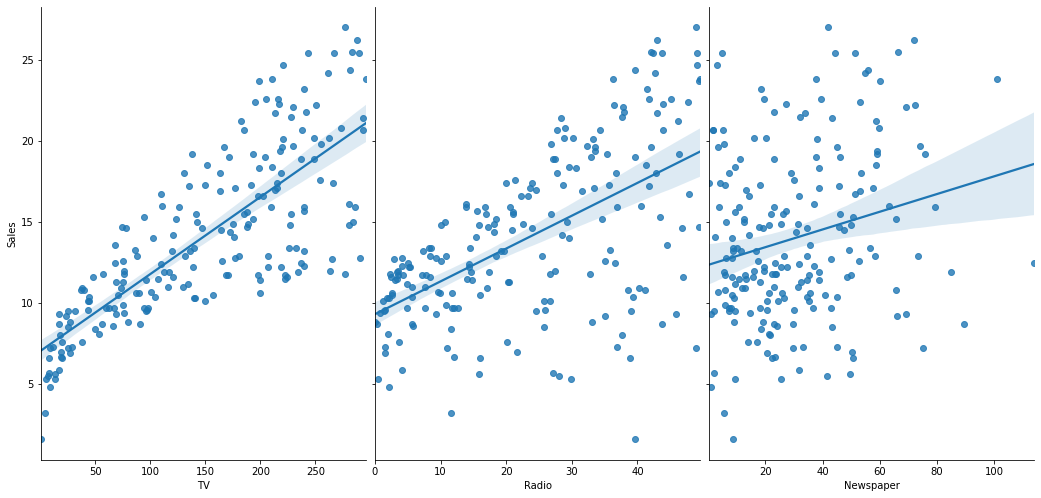

In [21]:
sns.pairplot(advert, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=.7, kind='reg')

<AxesSubplot:>

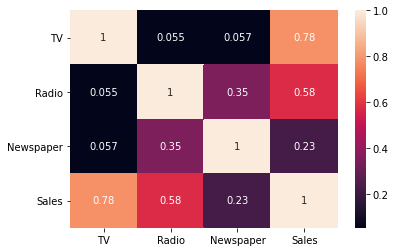

In [23]:
sns.heatmap(advert.corr(), annot=True)

### Task 6: Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [28]:
X = advert[['TV']]
y = advert.Sales

In [29]:
X.shape

(200, 1)

In [30]:
y.shape

(200,)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

### Task 7: Interpreting Model Coefficients

In [33]:
linreg.intercept_

6.91197261886872

In [35]:
linreg.coef_

array([0.04802945])

### Task 8: Making Predictions with our Model

In [36]:
y_pred = linreg.predict(X_test)
y_pred[:5]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

### Task 9: Model Evaluation Metrics

In [37]:
from sklearn import metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [38]:
metrics.mean_absolute_error(y_test, y_pred)

2.4643080986027908

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [39]:
metrics.mean_squared_error(y_test, y_pred)

10.310069587813155

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [40]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3.210929707703542